In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

churn_data=pd.read_csv('data/churn.csv', sep=',')
churn_data.drop(columns=['RowNumber'], axis=0, inplace=True)
churn_data.head()

# RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)
# CustomerId — идентификатор клиента
# Surname — фамилия клиента
# CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
# Geography — страна клиента (банк международный)
# Gender — пол клиента
# Age — возраст клиента
# Tenure — сколько лет клиент пользуется услугами банка
# Balance — баланс на счетах клиента в банке
# NumOfProducts — количество услуг банка, которые приобрёл клиент
# HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)
# IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
# EstimatedSalary — предполагаемая заработная плата клиента
# Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Задание 9.1
##### Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

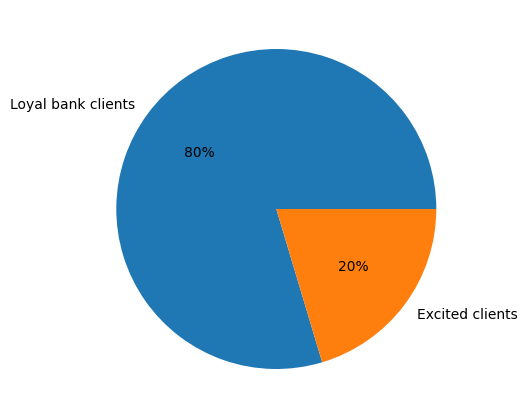

In [22]:
value_exited=churn_data['Exited'].value_counts()
fig=plt.figure(figsize=(4,4))
axes=fig.add_axes([1,1,1,1])
axes.pie(
    x=value_exited,
    labels=('Loyal bank clients','Excited clients'),
    autopct='%.0f%%',
    explode=[0,0]
); 

Комментарий к графику: по соотношению - на каждого ушедшего клиента приходится четверо активных.

Задание 9.2
##### Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

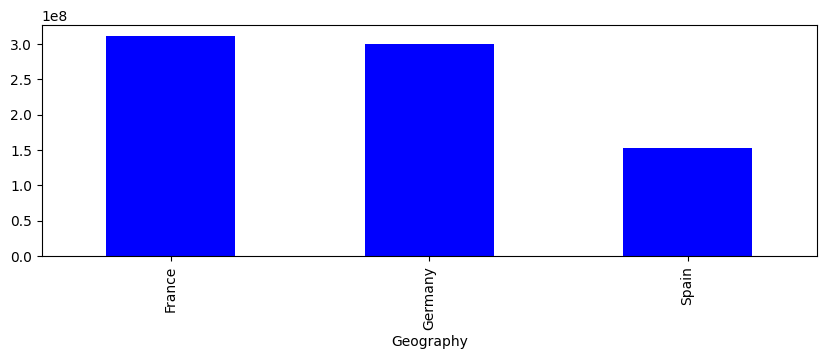

In [23]:
mask1=churn_data['Balance'] > 2500
balance_client = churn_data[mask1].groupby(['Geography'])['Balance'].sum()
balance_client.plot(
    kind='bar',
    grid=False,
    figsize=(10, 3),
    colormap='winter'
); 

Комментарий к графику: судя по столбчатой диаграмме суммарный баланс жителей из Испании в два раза меньше чем суммарные балансы жителей Франции и Германии

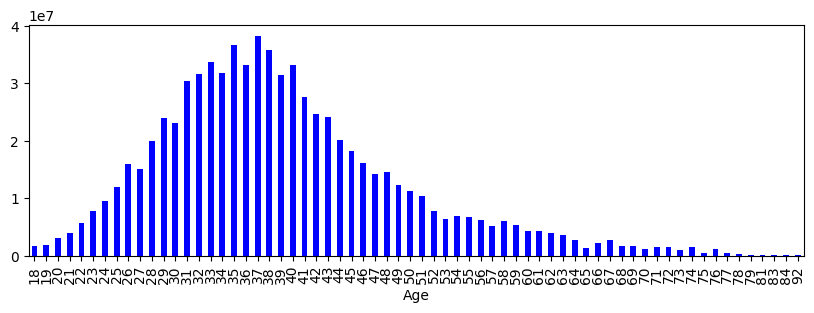

In [24]:
balance_client = churn_data[mask1].groupby(['Age'])['Balance'].sum()
balance_client.plot(
    kind='bar',
    grid=False,
    figsize=(10, 3),
    colormap='winter'
); 

Комментарий к графику: больщая часть накоплений представлена клиентами в возрастном интервале от 30 до 40

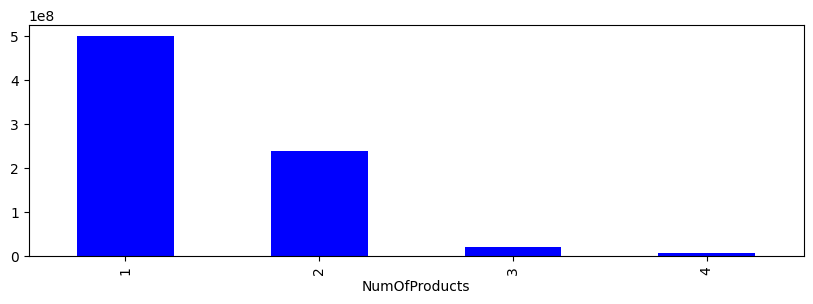

In [25]:
balance_client = churn_data[mask1].groupby(['NumOfProducts'])['Balance'].sum()
balance_client.plot(
    kind='bar',
    grid=False,
    figsize=(10, 3),
    colormap='winter'
); 

Комментарий к графику: судя по графику клиенты банка не особо заинтересованы в предлагаемых банком услугах. Так как большая часть вложений преставлена клиентами с минимальным количеством услуг

Задние 9.3
##### Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

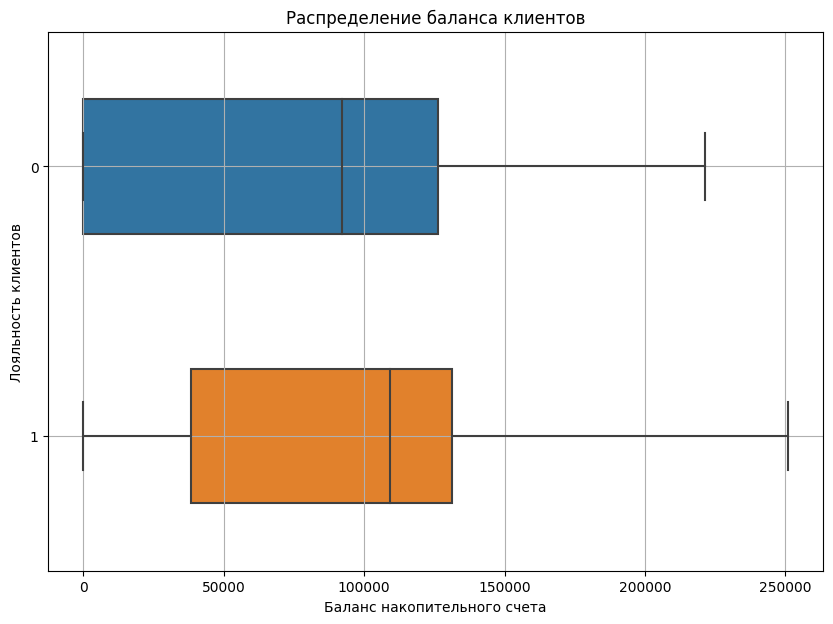

In [26]:
fig = plt.figure(figsize=(10,7))
boxplot = sns.boxplot(
    data=churn_data,
    y='Exited',
    x='Balance',
    orient='h',
    width=0.5
)
boxplot.set_title('Распределение баланса клиентов');
boxplot.set_xlabel('Баланс накопительного счета');
boxplot.set_ylabel('Лояльность клиентов');
boxplot.grid()

Комментарий к графику: у ушедших клиентов медиана баланса выше чем у лояльных клиентов, так же по ушедшим клиентам присутствует нижний квартиль в отличии от лояльных клиентов. Ответить на вопрос, что не нравиться клиентам и почему они уходят, я немогу

Задание 9.4
##### Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

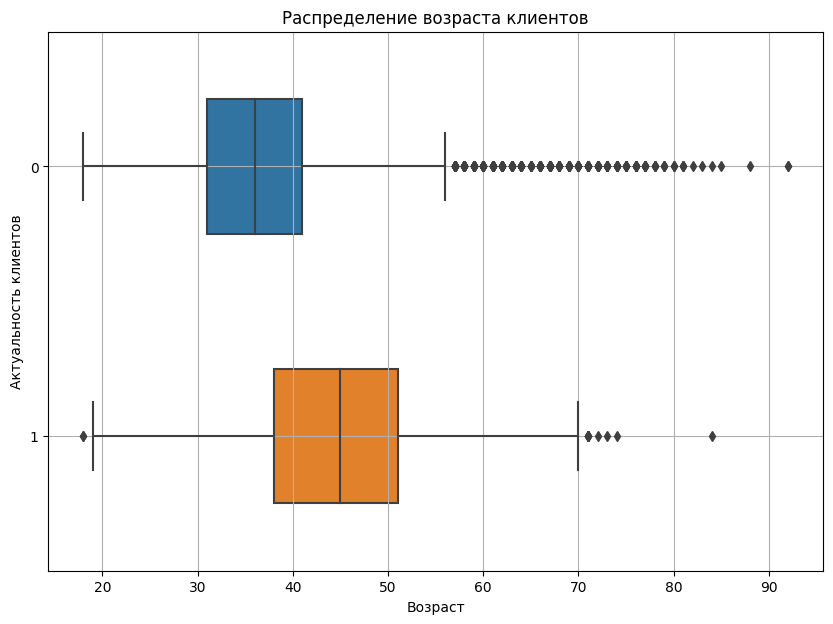

In [85]:
fig = plt.figure(figsize=(10,7))
boxplot = sns.boxplot(
    data=churn_data,
    y='Exited',
    x='Age',
    orient='h',
    width=0.5
)
boxplot.set_title('Распределение возраста клиентов'); 
boxplot.set_xlabel('Возраст'); 
boxplot.set_ylabel('Актуальность клиентов'); 
boxplot.grid()

Комментарий к графику: больше потенциальных выбросов в группе лояльных клиентов. Судя по графику, банку неободимо обратить внимание на возрастную категорию клиентов от 40 до 50, именно этой категорией представлена большая часть ушедших клиентов.

Задание 9.5
##### Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

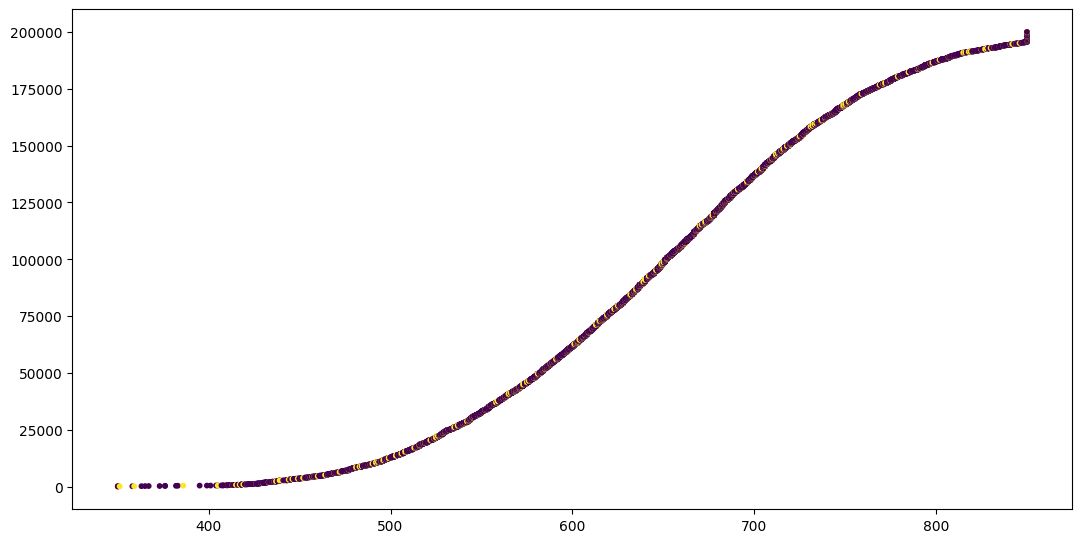

In [28]:
fig=plt.figure(figsize=(10,5))
axes=fig.add_axes([0,0,1,1])
axes.scatter(
    x=churn_data['CreditScore'].sort_values(ascending=True),
    y=churn_data['EstimatedSalary'].sort_values(),
    s=10,
    marker='o',
    c=churn_data['Exited']
); 

Комментарий к графику: из данного графика наблюдаю прямую зависимость предпологаемой з/п от кредитного рейтинга, чем выше кредитный рейтинг клиента, тем выше его предполагаемая з/п. Причем зависимость можно поделить на 3 участка:
1 - отсут-е роста предпологаемой з/п при условии кредитного рейтинга в интервале от 0 до 450;
2 - яркая прямая зависимость предполагаемой з/п от кредитного рейтинга в интервале от 550 до 750;
3 - снижение динамики увеличения предполагаемой з/п от кредитного рейтинга в интервале от 750 и выше.
Не совсем понял для чего было добавлять расцветку по признаку оттока.

Задание 9.6
##### Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это. Процент ушедших клиентов в каждой группе можно рассчитать как среднее по столбцу Exited (так как 1 — это ушедшие клиенты, а 0 — лояльные, среднее арифметическое по столбцу обозначает долю ушедших клиентов).

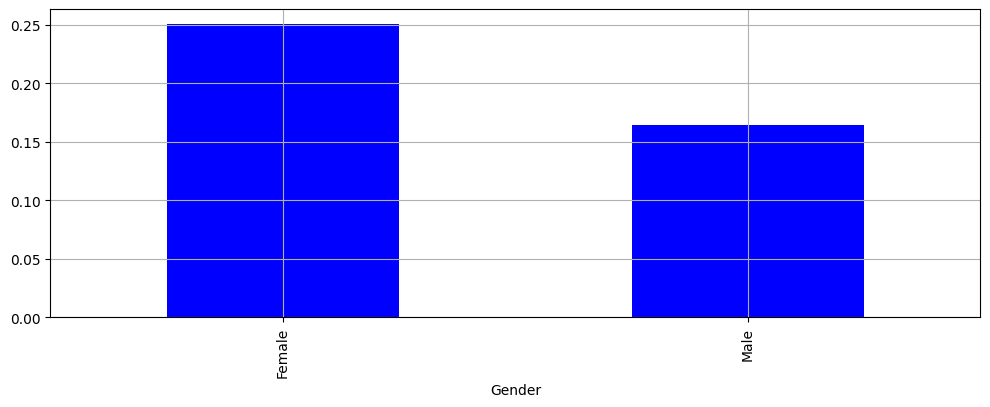

In [29]:
churn_data1=churn_data.groupby(['Gender'])['Exited'].mean()
churn_data1.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap='winter'
); 

Комментарии к графику: чаще всего уходят женщины

Задание 9.7
##### Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

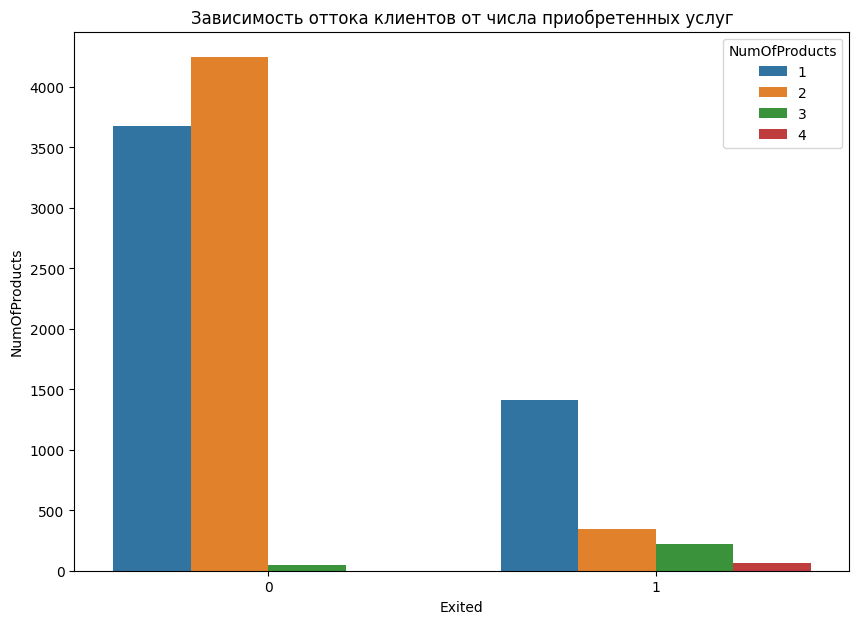

In [30]:
fig = plt.figure(figsize=(10, 7))
barplot = sns.barplot(
    data=churn_data,
    y='NumOfProducts',
    x='Exited',
    hue='NumOfProducts',
    estimator=len,
)
barplot.set_title('Зависимость оттока клиентов от числа приобретенных услуг'); 

Комментарий к графику: при приобретении у банка более 2 услуг клиент видимо "разочаровывается" и решает уйти из банка. На графике видно что у ушедших клиентов есть и по 4 услуги от банка, а так же видно доминирование ушедших клиентов с 3-мя услугами над лояльными клиентами с аналогичным количеством услуг.

Задание 9.8
##### Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

IsActiveMember
0    1302
1     735
Name: Exited, dtype: int64

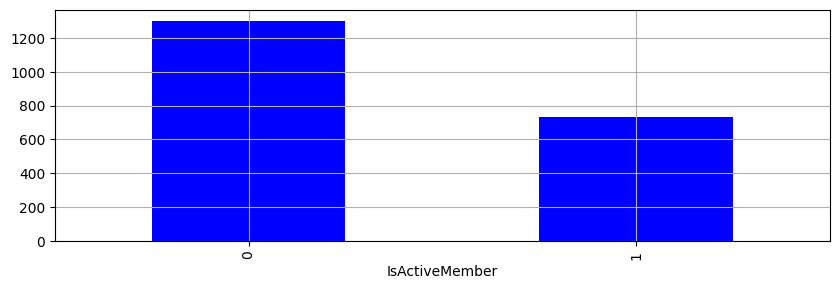

In [90]:
active_data = churn_data.groupby(['IsActiveMember'])['Exited'].sum()
display(active_data)
active_data.plot(
    kind='bar',
    grid=True,
    figsize=(10, 3),
    colormap='winter'
); 

Комментарий к графику: на основании графика видно, что среди ушедших клиентов с активным статусом в два раза меньше клиентов, чем без него. Из предложений - предложить актуальным клиентам статус активного, чтобы минимизировать потенциальный отток среди них.

Задание 9.9
##### В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

Задание 9.10
##### Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.
##### Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей. На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

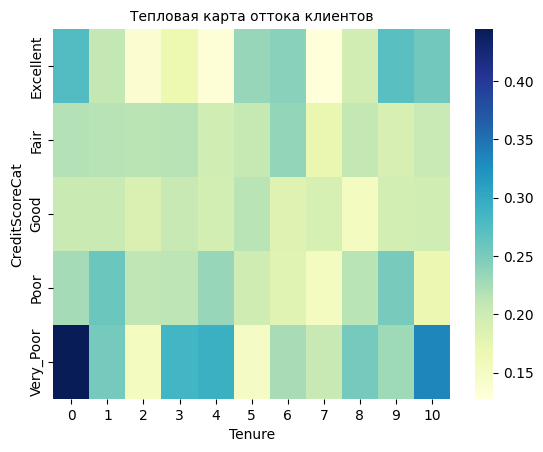

In [44]:
def get_credit_score_cat(CreditScore):
    if CreditScore >= 300 and CreditScore < 500:
        return "Very_Poor"
    elif CreditScore >= 500 and CreditScore < 601:
        return "Poor"
    elif CreditScore >= 601 and CreditScore < 661:
        return "Fair"
    elif CreditScore >= 661 and CreditScore < 781:
        return "Good"
    elif CreditScore >= 781 and CreditScore < 851:
        return "Excellent"
    elif CreditScore >= 851:
        return "Top"
    elif CreditScore < 300:
        return "Deep"
churn_data['CreditScoreCat']=churn_data['CreditScore'].apply(get_credit_score_cat)
pivot_credit=churn_data.pivot_table(
    values='Exited',
    columns='Tenure',
    index='CreditScoreCat'
)
heatmap=sns.heatmap(data=pivot_credit, cmap='YlGnBu')
heatmap.set_title('Тепловая карта оттока клиентов', fontsize=10); 

Комментарий к графику: если тепловая карта построена правильно, то можно сделать вывод, что чаще всего уходят клиенты с кредитным рейтингом в интервале от 300 до 500(категория Very Poor), которые пользуются услугами банка не более 1 года, а так же клиенты, которые пользуются услугами 3,4 и 10 лет, с этой же категории. Так же наблюдается отток клиентов с кредитным рейтингом в интервале от 781 до 851(категория Excellent), которые пользуются услугами банка не более 1 года, а так же кленты, которые пользуются услугами 5,6,9 и 10 лет, с этой же категории. Наиболее стабильная категория клиентов по лояльности - клиенты с кредитным рейтингом в интервале от 661 до 781(категория Good)